In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

%matplotlib inline

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)

# 1. Etude des résultats en période normale

In [12]:
df_global = pd.read_pickle("../results/general/x_pred_global_1.64_0.8.pk")

#df_global["gaspi_pred"]= (df_global["pred"] - df_global["reel"])/df_global["pred"]
print(df_global.shape)
df_global.head()


(131, 22)


,month_2,month_3,month_4,month_5,month_6,month_7,month_9,month_10,month_11,month_12,effectif,repas_noel,poisson,viande,4_derniers_jours,pred_upper,prevision,reel,pred,gaspillage,gaspi_pred,gaspi_pred_upper
date,,,,,,,,,,,,,,,,,,,,,,
2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,20344.0,0.0,14628.913573,12780.0,11471.0,14131.333342,0.102426,0.188258,0.215868
2018-09-04,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,0.0,15378.749299,14582.0,14070.0,14880.296420,0.035112,0.054454,0.085101
2018-09-06,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,20344.0,0.0,14628.913573,14553.0,14261.0,14131.333342,0.020065,-0.009176,0.025150
2018-09-07,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,0.0,15378.749299,15206.0,14930.0,14880.296420,0.018151,-0.003340,0.029180
2018-09-10,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,20344.0,0.0,14628.913573,14344.0,14015.0,14131.333342,0.022936,0.008232,0.041966


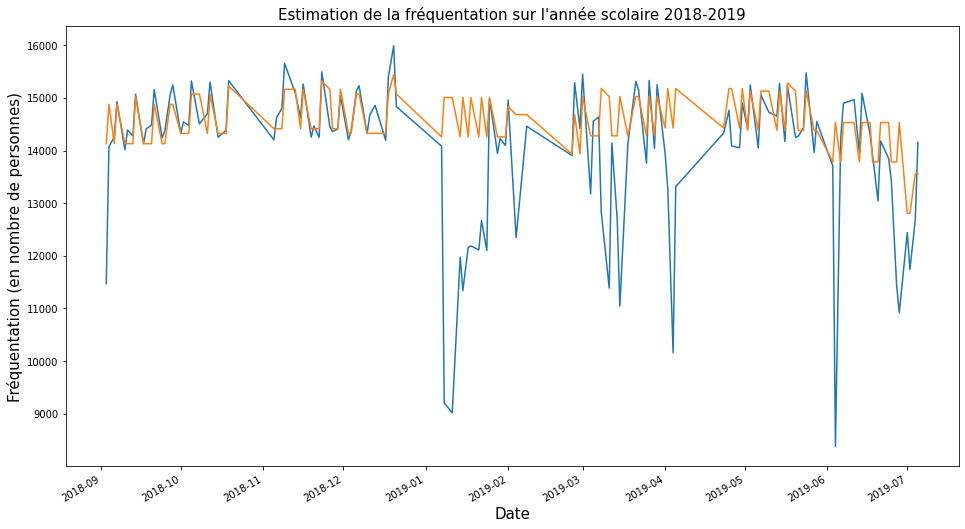

In [13]:
y_pred = df_global["pred"]
y_true = df_global["reel"]


plt.figure(figsize=(16,9))
y_true.plot(label="fréquentation réelle")
y_pred.plot(label="fréquentation estimée")


plt.title("Estimation de la fréquentation sur l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Fréquentation (en nombre de personnes)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.show()

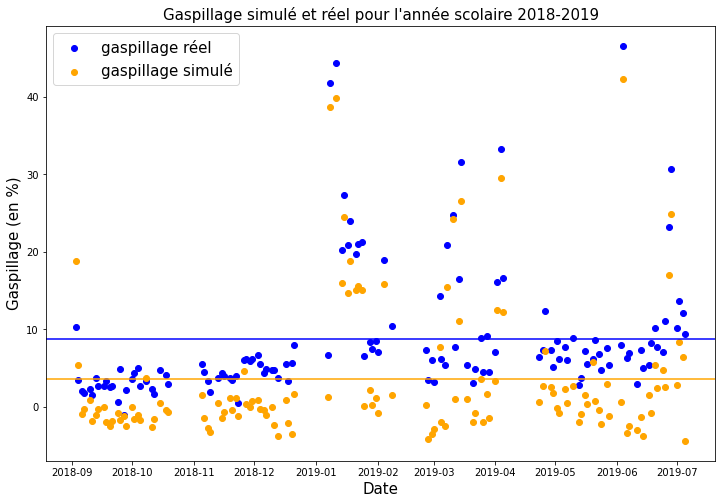

In [14]:
plt.figure(figsize=(12, 8))
plt.scatter(df_global.index, df_global.gaspillage.values*100, label="gaspillage réel", color="blue")
plt.axhline(df_global.gaspillage.mean()*100, color="blue")
plt.scatter(df_global.index, df_global.gaspi_pred.values*100, label="gaspillage simulé",color="orange")
plt.axhline(df_global.gaspi_pred.mean()*100,color="orange")

plt.title("Gaspillage simulé et réel pour l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Gaspillage (en %)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(fontsize=15)

In [15]:
print("gaspillage réel",df_global.gaspillage.mean())
print("gaspillage avec nos prédictions",df_global.gaspi_pred.mean())
print("--------------------------------------------")
print(len(df_global[df_global.gaspillage<0]), "jours réels avec un manque de repas")
print(len(df_global[df_global.gaspi_pred<0]), "jours estimés pour lesquels il y aurait eu un manque de repas")

gaspillage réel 0.08727683823040823
gaspillage avec nos prédictions 0.03546164464337167
--------------------------------------------
1 jours réels avec un manque de repas
58 jours estimés pour lesquels il y aurait eu un manque de repas


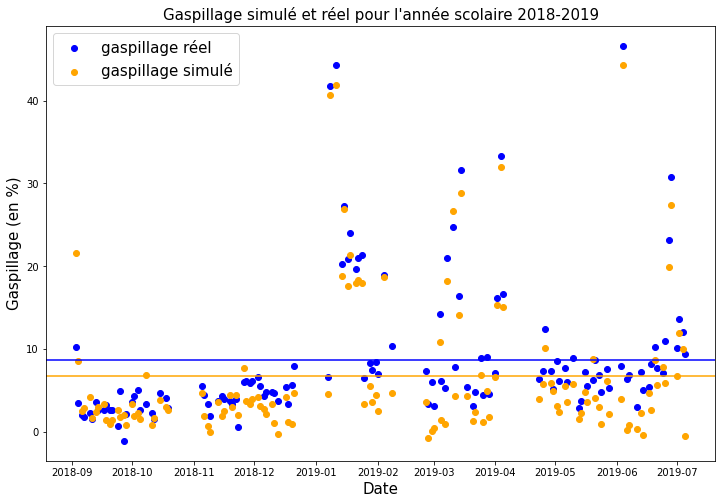

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(df_global.index, df_global.gaspillage.values*100, label="gaspillage réel", color="blue")
plt.axhline(df_global.gaspillage.mean()*100, color="blue")
plt.scatter(df_global.index, df_global.gaspi_pred_upper.values*100, label="gaspillage simulé",color="orange")
plt.axhline(df_global.gaspi_pred_upper.mean()*100,color="orange")

plt.title("Gaspillage simulé et réel pour l'année scolaire 2018-2019", fontsize=15)
plt.ylabel("Gaspillage (en %)", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.legend(fontsize=15)

In [17]:
df_global.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_9,month_10,month_11,month_12,effectif,repas_noel,poisson,viande,4_derniers_jours,pred_upper,prevision,reel,pred,gaspillage,gaspi_pred,gaspi_pred_upper
date,,,,,,,,,,,,,,,,,,,,,,
2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,20344.0,0.0,14628.913573,12780.0,11471.0,14131.333342,0.102426,0.188258,0.215868
2018-09-04,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,0.0,15378.749299,14582.0,14070.0,14880.296420,0.035112,0.054454,0.085101
2018-09-06,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,20344.0,0.0,14628.913573,14553.0,14261.0,14131.333342,0.020065,-0.009176,0.025150
2018-09-07,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,0.0,15378.749299,15206.0,14930.0,14880.296420,0.018151,-0.003340,0.029180
2018-09-10,0.0,0.0,0.0,0.0,0.0,0.0,20344.0,0.0,0.0,0.0,20344.0,0.0,0.0,20344.0,0.0,14628.913573,14344.0,14015.0,14131.333342,0.022936,0.008232,0.041966


In [18]:
print("gaspillage moyen réel sur l'année (en nb de repas par jour)",(df_global.prevision.sum() - df_global.reel.sum())/len(df_global))
print("gaspillage réel sur l'année (en pourcentage)",(df_global.prevision.sum() - df_global.reel.sum())/df_global.prevision.sum())


print("--------------------------------------------")
print("gaspillage avec nos prédictions en nb de repas",(df_global.pred_upper.sum() - df_global.reel.sum())/len(df_global))
print("gaspillage avec nos prédictions (en pourcentage)",(df_global.pred_upper.sum() - df_global.reel.sum())/df_global.pred_upper.sum())


print("--------------------------------------------")
print(len(df_global[df_global.gaspillage<0]), "jours réels avec un manque de repas")
print(len(df_global[df_global.gaspi_pred_upper<0]), "jours estimés pour lesquels il y aurait eu un manque de repas")

gaspillage moyen réel sur l'année (en nb de repas par jour) 1349.3435114503816
gaspillage réel sur l'année (en pourcentage) 0.08775969599569453
--------------------------------------------
gaspillage avec nos prédictions en nb de repas 1021.5813309274123
gaspillage avec nos prédictions (en pourcentage) 0.06788965545765314
--------------------------------------------
1 jours réels avec un manque de repas
4 jours estimés pour lesquels il y aurait eu un manque de repas


In [19]:
min(df_global[df_global.gaspi_pred_upper<0].pred_upper - df_global[df_global.gaspi_pred_upper<0].reel)

-107.1348406745492

In [20]:
df_global[df_global.gaspi_pred_upper<0].pred_upper - df_global[df_global.gaspi_pred_upper<0].reel

date
2018-12-13    -33.227365
2019-02-26   -107.134841
2019-06-14    -57.936847
2019-07-05    -71.614684
dtype: float64

In [ ]:
(8.77 - 6.19)/8.77